<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/ConLacNguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-18-bf12a55a55da>:69: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-18-bf12a55a55da>:70: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-18-bf12a55a55da>:71: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)


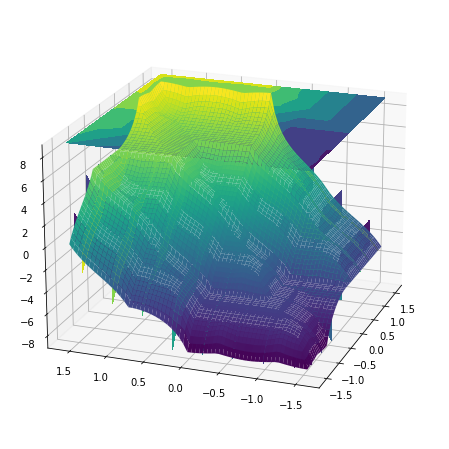

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.visualization import plt
from networkx.algorithms.bipartite import projection
from networkx import attr_sparse_matrix
universe = np.linspace(-np.pi/2,np.pi/2,61)
universe1 = np.linspace(-10,10,61)

angle = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2,1), 'angle')
d_angle = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2,1), 'd_angle')
f = ctrl.Consequent(np.arange(-10,10,1), 'f')

angle=ctrl.Antecedent(universe,'angle')
d_angle=ctrl.Antecedent(universe,'d_angle')

f=ctrl.Consequent(universe1,'f')

namea=['LN','N','ZE','P','LP']
nameda=['LN','N','ZE','P','LP']
namesT=['LN','N','ZE','P','LP']

angle.automf(names=namea)
d_angle.automf(names=nameda)
f.automf(names=namesT)

rule1 = ctrl.Rule(angle['LN']&d_angle['LN'], f['LN'])
rule2 = ctrl.Rule(angle['LN']&d_angle['N'], f['LN'])
rule3 = ctrl.Rule(angle['LN']&d_angle['ZE'], f['LN'])
rule4 = ctrl.Rule(angle['LN']&d_angle['P'], f['N'])
rule5 = ctrl.Rule(angle['LN']&d_angle['LP'], f['ZE'])
rule6 = ctrl.Rule(angle['N']&d_angle['LN'], f['LN'])
rule7 = ctrl.Rule(angle['N']&d_angle['N'], f['N'])
rule8 = ctrl.Rule(angle['N']&d_angle['ZE'], f['N'])
rule9 = ctrl.Rule(angle['N']&d_angle['P'], f['ZE'])
rule10 = ctrl.Rule(angle['N']&d_angle['LP'], f['P'])
rule11 = ctrl.Rule(angle['ZE']&d_angle['LN'], f['N'])
rule12 = ctrl.Rule(angle['ZE']&d_angle['N'], f['N'])
rule13 = ctrl.Rule(angle['ZE']&d_angle['ZE'], f['ZE'])
rule14 = ctrl.Rule(angle['ZE']&d_angle['P'], f['P'])
rule15 = ctrl.Rule(angle['ZE']&d_angle['LP'], f['P'])
rule16 = ctrl.Rule(angle['P']&d_angle['LN'], f['N'])
rule17 = ctrl.Rule(angle['P']&d_angle['N'], f['ZE'])
rule18 = ctrl.Rule(angle['P']&d_angle['ZE'], f['P'])
rule19 = ctrl.Rule(angle['P']&d_angle['P'], f['P'])
rule20 = ctrl.Rule(angle['P']&d_angle['LP'], f['LP'])
rule21 = ctrl.Rule(angle['LP']&d_angle['LN'], f['N'])
rule22 = ctrl.Rule(angle['LP']&d_angle['N'], f['ZE'])
rule23 = ctrl.Rule(angle['LP']&d_angle['ZE'], f['LP'])
rule24 = ctrl.Rule(angle['LP']&d_angle['P'], f['LP'])
rule25 = ctrl.Rule(angle['LP']&d_angle['LP'], f['LP'])

f_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
force = ctrl.ControlSystemSimulation(f_ctrl, flush_after_run = 61*61+1)
upsampled = np.linspace(-np.pi/2,np.pi/2,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    force.input['angle'] = x[i,j]
    force.input['d_angle'] = y[i,j]
    force.compute()
    z[i,j] = force.output['f']

# Ve surface, do thi cua ham va cac bien dau vao, be mat dieu khien
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(20,200)